# Lab 2 Kanjonavo Sabud

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve

In [2]:
G = 6.6743e-11        
g0 = 9.81             
M_E = 5.972e24         
M_Moon = 7.35e22    
R_E = 6378100.0     
R_Moon = 1738100.0    
Omega = 7.272e-5     
height = 4000
mass = 1

## Part 1

In [3]:
t_free_fall = np.sqrt((2 * height) / g0)
print(f"Algebraic free-fall time (ignoring air resistance): {t_free_fall} s")

Algebraic free-fall time (ignoring air resistance): 28.55686245854129 s


In [4]:
def ode_system(t, y):
    return [y[1],-g0]

def hit_bottom(t, y):
    return y[0] + height

hit_bottom.terminal = True
hit_bottom.direction = -1

In [5]:
y0 = [0.0, 0.0]
t_span = (0, 100)  

sol = solve_ivp(
    ode_system,
    t_span,
    y0,
    events=hit_bottom,
    dense_output=True
)

t_hit = sol.t_events[0][0]
print(f"Numerical solution: object reaches y = -4000 m at t = {t_hit:.4f} s")
print(f"Difference in times: {t_hit-t_free_fall}")

Numerical solution: object reaches y = -4000 m at t = 28.5569 s
Difference in times: -1.4210854715202004e-14


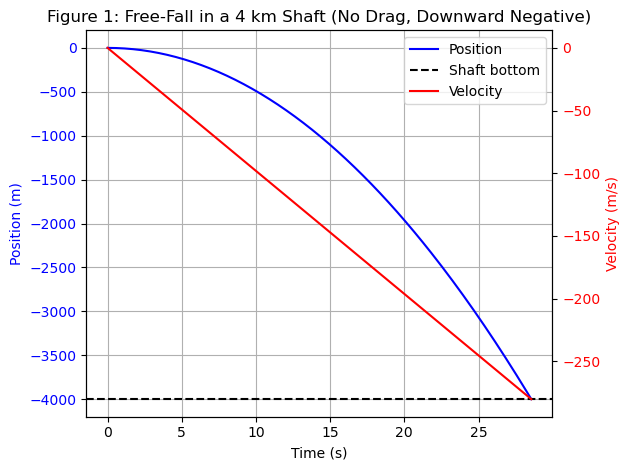

In [6]:
t_eval = np.linspace(0, t_hit, 200)
sol_y = sol.sol(t_eval)  
position = sol_y[0, :]
velocity = sol_y[1, :]

fig, ax1 = plt.subplots()
ax1.set_title("Figure 1: Free-Fall in a 4 km Shaft (No Drag, Downward Negative)")
ax1.set_xlabel("Time (s)")

ax1.set_ylabel("Position (m)", color="blue")
ax1.plot(t_eval, position, color="blue", label="Position")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid()
ax1.axhline(y=-height, color='black', linestyle='--', label="Shaft bottom")

ax2 = ax1.twinx()
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.plot(t_eval, velocity, color="red", label="Velocity")
ax2.tick_params(axis="y", labelcolor="red")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()

# Part 2

In [7]:
def grav(r): return g0 * (r/R_E)

def fall_ode(t, Y):
    y, v = Y
    r = R_E + y
    dydt = v
    dvdt = -grav(r) - alpha * np.abs(v)**gamma * np.sign(v)
    return [dydt, dvdt]

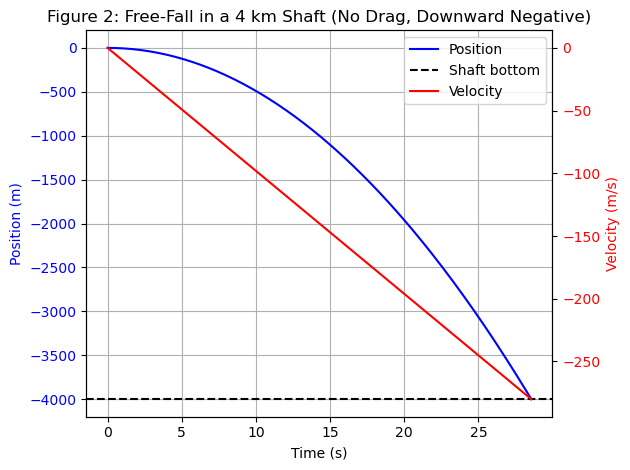

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.000e-04  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  1.111e+01  2.856e+01]
        y: [[ 0.000e+00 -4.905e-08 ... -6.055e+02 -4.000e+03]
            [ 0.000e+00 -9.810e-04 ... -1.090e+02 -2.801e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x134f2ca70>
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0

In [8]:
alpha = 0         
gamma = 1

y0 = 0
v0 = 0
t_span = (0, 100)

sol = solve_ivp(fall_ode, t_span, (y0, v0), events=hit_bottom, dense_output=True)


t_hit = sol.t_events[0][0]
t_eval = np.linspace(0, t_hit, 200)
sol_y = sol.sol(t_eval)
position = sol_y[0, :]
velocity = sol_y[1, :]

fig, ax1 = plt.subplots()
ax1.set_title("Figure 2: Free-Fall in a 4 km Shaft (No Drag, Downward Negative)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (m)", color="blue")
ax1.plot(t_eval, position, color="blue", label="Position")
ax1.tick_params(axis="y", labelcolor="blue")

ax1.axhline(y=-height, color='black', linestyle='--', label="Shaft bottom")
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.plot(t_eval, velocity, color="red", label="Velocity")
ax2.tick_params(axis="y", labelcolor="red")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()
sol

#### It doesnt really change the trajectory of the particle significantly. However, the ending time did slightly increase (longer time) as it theoretically should. The height dependence makes the acceleration decrease as you get closer to the center of the Earth

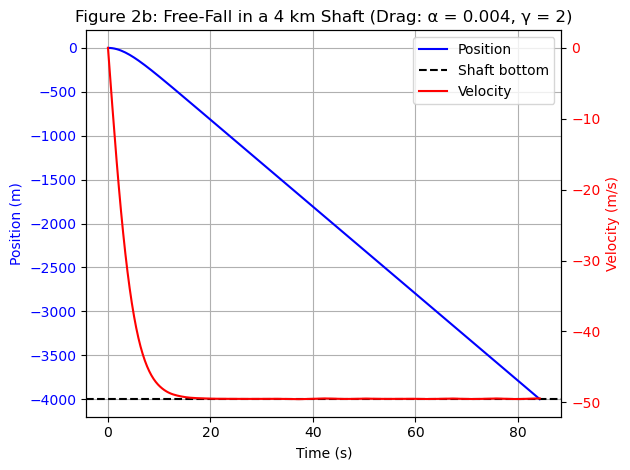

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.000e-04 ...  7.608e+01  8.428e+01]
        y: [[ 0.000e+00 -4.905e-08 ... -3.594e+03 -4.000e+03]
            [ 0.000e+00 -9.810e-04 ... -4.947e+01 -4.946e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x134ffc980>
 t_events: [array([ 8.428e+01])]
 y_events: [array([[-4.000e+03, -4.946e+01]])]
     nfev: 128
     njev: 0
      nlu: 0

In [9]:
alpha = 0.004
gamma = 2 

sol = solve_ivp(fall_ode, t_span, (y0, v0), events=hit_bottom, dense_output=True)

t_hit = sol.t_events[0][0]
t_eval = np.linspace(0, t_hit, 200)
sol_y = sol.sol(t_eval)
position = sol_y[0, :]
velocity = sol_y[1, :]

fig, ax1 = plt.subplots()

ax1.set_title("Figure 2b: Free-Fall in a 4 km Shaft (Drag: α = 0.004, γ = 2)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (m)", color="blue")
ax1.plot(t_eval, position, color="blue", label="Position")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.axhline(y=-4000, color='black', linestyle='--', label="Shaft bottom")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.plot(t_eval, velocity, color="red", label="Velocity")
ax2.tick_params(axis="y", labelcolor="red")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()
sol

#### Accounting for drag we see that the particle takes much longer to reach the bottom of the shaft (>80 seconds) compared to no drag scenario (~30 seconds)
#### Drag coeff - 0.004 was calibrated using a terminal velocity of 50 m/s as was done in lecture.

# Part 3

In [10]:
def cf(t, s):
    x, y, vx, vy = s
    return [vx, vy,
            2 * Omega * vy - drag_A * vx * abs(vx),
            g0 - 2 * Omega * vx - drag_A * vy * abs(vy)]

s0 = [0, 0, 0, 0]

def event_bottom(t, s):
    return s[1] - 4000
event_bottom.terminal = True
event_bottom.direction = 1

Max horizontal displacement (no drag): 5.526237808397112


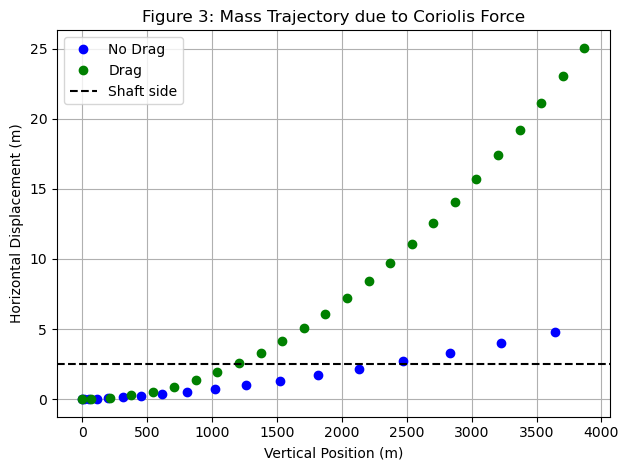

In [11]:
drag_A = 0

t_eval_nd = np.linspace(0, 40, 500)
sol_nd = solve_ivp(cf, (0, 40), s0, t_eval=t_eval_nd, events=event_bottom)
x_nd = sol_nd.y[0]     
y_nd = sol_nd.y[1]   

drag_A = 0.0057

t_eval_drag = np.linspace(0, 100, 500)
sol_drag = solve_ivp(cf, (0, 100), s0, t_eval=t_eval_drag, events=event_bottom)
x_drag = sol_drag.y[0]
y_drag = sol_drag.y[1]

fig, ax = plt.subplots()
# ax.plot(y_nd, x_nd, label="No Drag", color='red')
ax.plot(y_nd[::20], x_nd[::20], 'o', color='blue', label="No Drag")
ax.plot(y_drag[::20], x_drag[::20], 'o', color='green', label="Drag")
ax.set_xlabel("Vertical Position (m)")
ax.set_ylabel("Horizontal Displacement (m)")
ax.set_title("Figure 3: Mass Trajectory due to Coriolis Force")
ax.axhline(y=2.5, color='black', linestyle='--', label="Shaft side")

ax.legend()
ax.grid(True)
fig.tight_layout()

print("Max horizontal displacement (no drag):", np.max(x_nd))

In [12]:
def event_side(t, s):
    return s[0]-2.5
event_bottom.terminal = True

drag_A = 0

t_eval_drag = np.linspace(0, 100, 500)
sol_nd = solve_ivp(cf, (0, 100), s0, t_eval=t_eval_drag, events=event_side)
t_hit = sol_nd.t_events[0][0]

print(f"No Drag Shaft Side Hit at: {t_hit} s")
print(f"Height when Shaft Side Hit: {sol_nd.y_events[0][0][1]} m")

drag_A = 0.0057

t_eval_drag = np.linspace(0, 100, 500)
sol_d = solve_ivp(cf, (0, 100), s0, t_eval=t_eval_drag, events=event_side)
t_hit = sol_d.t_events[0][0]
print(f"No Drag Shaft Side Hit at: {t_hit} s")
print(f"Height when Shaft Side Hit: {sol_d.y_events[0][0][1]} m")

No Drag Shaft Side Hit at: 21.906872681347956 s
Height when Shaft Side Hit: 2353.9618101944793 m
No Drag Shaft Side Hit at: 31.67843741574599 s
Height when Shaft Side Hit: 1192.5707380385038 m


#### For both cases (no drag and drag) the particles bumps into the shaft wall first. When we turn the drag on, it takes longer to reach the wall and the bottom but there is a significant time difference between hitting the wall and reaching the bottom which was not present when drag was off.

# Part 4

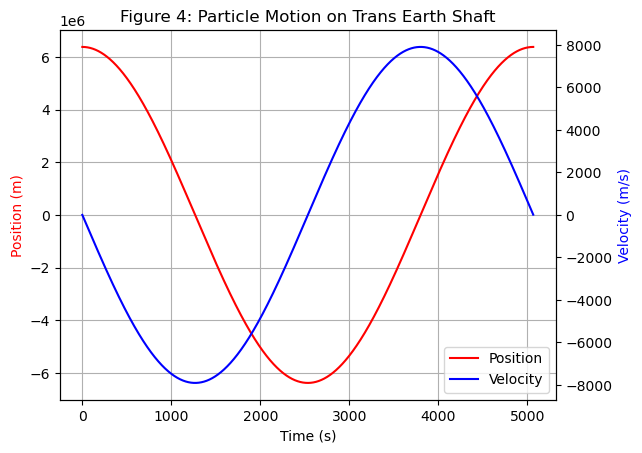

 Full Earth transit in 2419.023637244518 s.


In [13]:
a_mod = 0
expnt = 0

def freefall(t, state):
    pos, vel = state
    return vel, -grav(pos) + a_mod * np.abs(vel)**expnt

t0, t_end = 0, 5065
pos0, v0 = R_E, 0
t_grid = np.linspace(t0, t_end, 50650)

def event_exit(t, state):
    return state[0] + 0.99 * R_E
event_exit.terminal = False

sol = solve_ivp(freefall, (t0, t_end), [pos0, v0], t_eval=t_grid, events=event_exit, rtol=1e-9)
t_sol, pos_sol, vel_sol = sol.t, sol.y[0], sol.y[1]
exit_time = sol.t_events[0][0]

fig, ax1 = plt.subplots()
ax1.plot(t_sol, pos_sol, 'r-', label='Position')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (m)", color='r')
ax1.set_title("Figure 4: Particle Motion on Trans Earth Shaft")
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(t_sol, vel_sol, 'b-', label='Velocity')
ax2.set_ylabel("Velocity (m/s)", color='b')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower right")

plt.show()

print(f" Full Earth transit in {exit_time} s.")

#### Takes 2419.02 seconds to travel through one end of Earth to the other end of Earth.

In [14]:
def event_center(t, state):
    return state[0]
event_center.terminal = True

sol_center = solve_ivp(freefall, (t0, t_end), [pos0, v0], t_eval=t_grid, events=event_center, rtol=1e-9)
center_time = sol_center.t_events[0][0]
center_speed = np.abs(sol_center.y[1][-1])

orb_speed = np.sqrt(G * M_E / R_E)
orb_period = (2 * np.pi * R_E) / orb_speed

print(f"\nReached center in {center_time:.3f} s at {center_speed:.3f} m/s.")
print(f"Orbital speed: {orb_speed:.3f} m/s; period: {orb_period:.3f} s.")
print(f"Period exceeds transit time by {orb_period - exit_time:.3f} s.")


Reached center in 1266.575 s at 7910.067 m/s.
Orbital speed: 7905.277 m/s; period: 5069.371 s.
Period exceeds transit time by 2650.348 s.


#### Orbit is ~2x of the Transit Time.

# Part 5

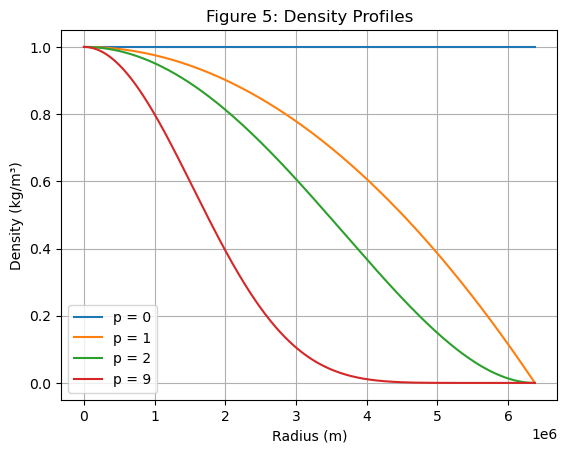

In [15]:
p_vals = [0, 1, 2, 9]  # density profile exponents

def dens(r, p, norm):
    return norm * (1 - (r**2 / R_E**2))**p

Npts = 1000
r_vals = np.linspace(0, R_E, Npts)

fig, ax = plt.subplots()
for p in p_vals:
    ax.plot(r_vals, dens(r_vals, p, 1), label=f"p = {p}")
ax.set_xlabel("Radius (m)")
ax.set_ylabel("Density (kg/m³)")
ax.set_title("Figure 5: Density Profiles")
ax.legend()
ax.grid()
plt.show()

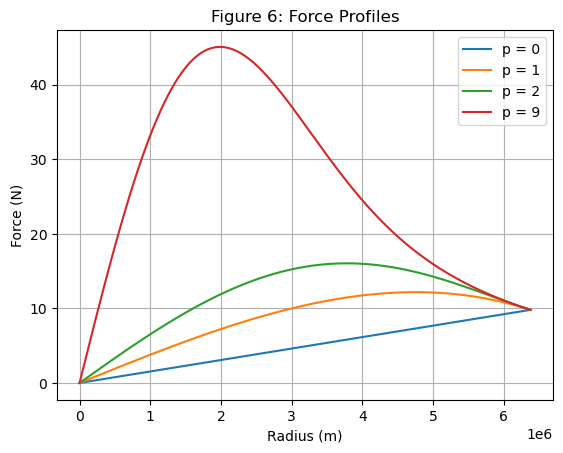

In [16]:
def calc_mass(r, p, norm):
    val, _ = quad(lambda x: 4*np.pi * dens(x, p, norm) * x**2, 0, r)
    return val if not np.isclose(val, 0) else np.nan

# Surface force at Earth's surface:
surf_F = G * M_E / R_E**2

# Solve for normalization such that: G*M(R_E)/R_E^2 = surf_F
def norm_eq(norm, p):
    return G * calc_mass(R_E, p, norm) / R_E**2 - surf_F

norms = {p: fsolve(lambda n: norm_eq(n, p), 1)[0] for p in p_vals}

# Compute force profile: F(r) = G*M(r)/r^2 (with F=0 at r=0)
force_profiles = {}
for p in p_vals:
    F = [0 if r==0 else G * calc_mass(r, p, norms[p]) / r**2 for r in r_vals]
    force_profiles[p] = np.array(F)

fig, ax = plt.subplots()
for p in p_vals:
    ax.plot(r_vals, force_profiles[p], label=f"p = {p}")
ax.set_xlabel("Radius (m)")
ax.set_ylabel("Force (N)")
ax.set_title("Figure 6: Force Profiles")
ax.legend()
ax.grid(True)
plt.show()

n = 0
  Center reached at t = 1267.3427359277916 s, v = -7905.275739934609 m/s
  Otherside event not reached.

n = 1
  Center reached at t = 1096.5126460675938 s, v = -10457.70051710269 m/s
  Otherside event not reached.

n = 2
  Center reached at t = 1035.0755281406587 s, v = -12182.849276018953 m/s
  Otherside reached at t = 1909.330339795242 s, v = -1597.0357880557572 m/s

n = 9
  Center reached at t = 943.77749708619 s, v = -18370.67802529092 m/s
  Otherside reached at t = 1726.734043880901 s, v = -1597.0772379616203 m/s



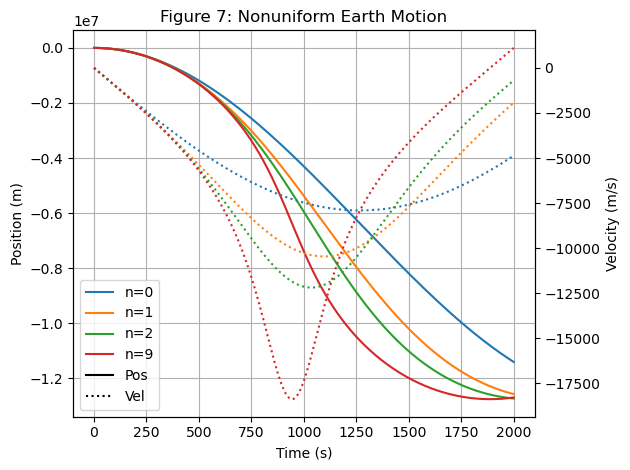

In [17]:
def make_ode(p):
    def ode(t, s):
        y, v = s

        r_eff = R_E - abs(y)
        I, _ = quad(lambda r: r**2 * norms[p] * (1 - (r/R_E)**2)**p, 0, r_eff)
        a = (G * 4*np.pi * I) / r_eff**2
        return [v, -a]
    return ode

def ev_center(t, s): 
    return s[0] + R_E
def ev_side(t, s):
    return s[0] + (0.99 * 2 * R_E)
ev_center.terminal = ev_side.terminal = False

t0, tf = 0, 2000  
t_eval = np.linspace(t0, tf, 1000)
ics = [0, 0]  # initial: y=0, v=0

fig, axP = plt.subplots()
axV = axP.twinx()
for p in p_vals:
    sol = solve_ivp(make_ode(p), (t0, tf), ics, t_eval=t_eval,
                    events=[ev_center, ev_side],
                    rtol=1e-6, atol=1e-8)


        # Check if events occurred before trying to index them.
    if sol.t_events[0].size > 0:
        t_center = sol.t_events[0][0]  # seconds
        v_center = sol.y_events[0][0][1]  # m/s
    else:
        t_center = None
        v_center = None
        
    if sol.t_events[1].size > 0:
        t_otherside = sol.t_events[1][0]  # seconds
        v_otherside = sol.y_events[1][0][1]  # m/s
    else:
        t_otherside = None
        v_otherside = None

    print(f"n = {p}")
    if t_center is not None:
        print(f"  Center reached at t = {t_center} s, v = {v_center} m/s")
    else:
        print("  Center event not reached.")
    if t_otherside is not None:
        print(f"  Otherside reached at t = {t_otherside} s, v = {v_otherside} m/s")
    else:
        print("  Otherside event not reached.")

    print()
    
    axP.plot(sol.t, sol.y[0], label=f"n={p}")
    axV.plot(sol.t, sol.y[1], linestyle=':')

axP.plot(0,0,'k-', label="Pos")
axP.plot(0,0,'k:', label="Vel")
h1, l1 = axP.get_legend_handles_labels()
h2, l2 = axV.get_legend_handles_labels()
axP.legend(h1+h2, l1+l2, loc="lower left")

axP.set_xlabel("Time (s)")
axP.set_ylabel("Position (m)")
axV.set_ylabel("Velocity (m/s)")
axP.grid()
axP.set_title("Figure 7: Nonuniform Earth Motion")
fig.tight_layout()
plt.show()

#### For n = 0, takes 2032.1898269516355 seconds to travel across
#### For n = 9, takes 1726.734043880901 seconds to travel across

# Part 6

In [18]:
p=0 # setting n = 0 so constant density

def dens(r, p, norm): return norm * (1 - (r**2 / R_Moon**2))**p

def calc_norm(p):
    f = lambda r: 4 * np.pi * r**2 * (1 - (r/R_Moon)**2)**p
    I, _ = quad(f, 0, R_Moon)
    return M_Moon / I

norm_val = calc_norm(p)

def make_ode(p):
    def ode(t, s):
        y, v = s

        r_eff = R_Moon - abs(y)

        I, _ = quad(lambda r: r**2 * norm_val * (1 - (r/R_Moon)**2)**p, 0, r_eff)

        a = (G * 4 * np.pi * I) / (r_eff**2)
        return [v, -a]
    return ode

def ev_center(t, s):
    return s[0] + R_Moon

def ev_otherside(t, s):
    return s[0] + (0.99 * 2 * R_Moon)
ev_otherside.terminal = True

t0 = 0
tf = 40000         
ics = [0, 0]      

sol = solve_ivp(make_ode(p), (t0, tf), ics, rtol=1e-6, atol=1e-8, events=[ev_center, ev_otherside])

if sol.t_events[1].size > 0:
    t_transit = sol.t_events[1][0]
    print(f"Time to transit through the Moon: {t_transit} seconds")
else:
    print("Transit event not reached.")

Time to transit through the Moon: 3042.97967967437 seconds


In [19]:
def density(M, R):
    return M / ((4/3) * np.pi * R**3)

# Compute densities
rho_earth = density(M_E, R_E)
rho_moon = density(M_Moon, R_Moon)

# Compare
ratio = rho_moon / rho_earth

# Output
print(f"Earth density: {rho_earth} kg/m³")
print(f"Moon density: {rho_moon} kg/m³")
print(f"Density ratio (Moon / Earth): {ratio}")

Earth density: 5494.867409551201 kg/m³
Moon density: 3341.7538038703183 kg/m³
Density ratio (Moon / Earth): 0.6081591337511927


In [20]:
print(f"Sqrt(1/density ratio) = {1/np.sqrt(rho_earth/rho_moon)}")
print(f"Earth crossing time / moon crossing time = {2373.054326636764/3040.572738802148}")

Sqrt(1/density ratio) = 0.7798455832735046
Earth crossing time / moon crossing time = 0.7804629359308284


#### As the orbital period is related to density by T = SQRT(3/4pi * G * Rho) we can say that the ratio between the crossing times and density depends on the following relationship: 

#### t1/t2 = sqrt ( rho1 / rho2)

#### We see this is true as earth time / moon time = 0.7804629359308284 ~ Sqrt(1/density ratio) = 0.7798455832735046 